In [3]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam 
#from keras.utils.np_utils import to_categorical

from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.utils import to_categorical

In [4]:
csv_filename = "qc aggregated data.csv"
df = pd.read_csv(csv_filename)
df[["tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed", "winddir", "conditions"]]

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,conditions
0,29.3,24.5,26.9,32.3,24.5,28.7,22.6,77.4,8.8,4.5,"Rain, Partially cloudy"
1,31.0,24.7,27.6,35.4,24.7,29.2,21.9,72.1,16.7,69.1,"Rain, Partially cloudy"
2,31.9,22.8,27.1,34.2,22.8,28.0,19.7,65.0,17.1,66.2,Partially cloudy
3,31.2,21.6,26.8,34.4,21.6,27.9,20.3,68.7,11.1,44.0,"Rain, Partially cloudy"
4,30.9,23.3,27.1,33.0,23.3,28.2,21.1,71.0,17.2,77.8,"Rain, Partially cloudy"
...,...,...,...,...,...,...,...,...,...,...,...
1303,30.8,25.7,27.8,38.8,25.7,32.4,25.4,86.5,16.7,233.0,"Rain, Overcast"
1304,29.9,24.2,26.9,37.3,24.2,29.6,24.9,89.5,14.6,228.3,"Rain, Overcast"
1305,29.4,21.9,25.7,36.3,21.9,26.9,25.0,94.9,11.2,265.7,"Rain, Overcast"
1306,28.0,24.9,26.6,34.5,24.9,29.0,25.1,92.0,19.3,254.2,"Rain, Overcast"


In [5]:
X = df[["tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed", "winddir"]]
y = df["conditions"]
X = np.array(X)
y = np.array(y)

le = LabelEncoder()
le.fit(y)
y = le.transform(y)
y = to_categorical(y)

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, test_size=0.2, random_state=0)

Epoch 1/50
27/27 - 1s - loss: 6.1930 - accuracy: 0.4258 - val_loss: 0.9641 - val_accuracy: 0.7000 - 756ms/epoch - 28ms/step
Epoch 2/50
27/27 - 0s - loss: 0.9889 - accuracy: 0.6005 - val_loss: 0.7787 - val_accuracy: 0.6810 - 45ms/epoch - 2ms/step
Epoch 3/50
27/27 - 0s - loss: 0.7999 - accuracy: 0.6543 - val_loss: 0.7680 - val_accuracy: 0.6333 - 45ms/epoch - 2ms/step
Epoch 4/50
27/27 - 0s - loss: 0.7618 - accuracy: 0.6794 - val_loss: 0.6922 - val_accuracy: 0.7048 - 44ms/epoch - 2ms/step
Epoch 5/50
27/27 - 0s - loss: 0.8013 - accuracy: 0.6507 - val_loss: 0.7100 - val_accuracy: 0.6810 - 47ms/epoch - 2ms/step
Epoch 6/50
27/27 - 0s - loss: 0.7536 - accuracy: 0.6651 - val_loss: 0.6797 - val_accuracy: 0.6762 - 44ms/epoch - 2ms/step
Epoch 7/50
27/27 - 0s - loss: 0.7145 - accuracy: 0.6878 - val_loss: 0.6722 - val_accuracy: 0.7048 - 44ms/epoch - 2ms/step
Epoch 8/50
27/27 - 0s - loss: 0.7082 - accuracy: 0.6926 - val_loss: 0.6566 - val_accuracy: 0.7048 - 45ms/epoch - 2ms/step
Epoch 9/50
27/27 - 0s 

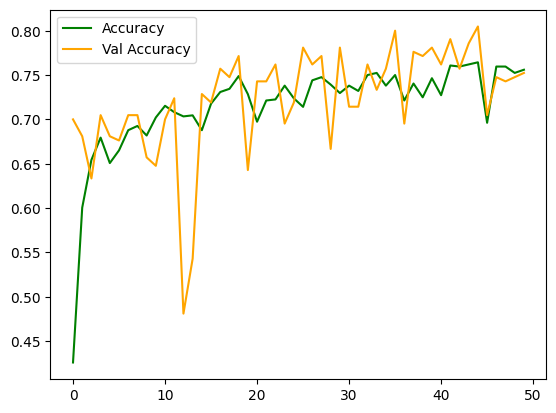

In [7]:
model = Sequential([
    layers.InputLayer(10, ),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(
    #loss='mae',
    #optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics=["accuracy"])

history = model.fit(
    X_train,
    y_train, 
    validation_data = (X_valid, y_valid),
    epochs = 50,
    verbose = 2
)

plt.plot(history.history["accuracy"], label="Accuracy", color="green")
plt.plot(history.history["val_accuracy"], label="Val Accuracy", color="orange")
plt.legend()
plt.show()

In [22]:
test_pred = model.predict(X_train)
test_pred = np.argmax(to_categorical(test_pred), axis=1)
test_pred = le.inverse_transform(test_pred)


27/27 [==============================] - 0s 737us/step


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['Overcast'], dtype=object)

# Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sn

X = df[["tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed", "winddir"]]
y = df["conditions"]

le = LabelEncoder()
le.fit(y)
y = le.transform(y)

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, test_size=0.2, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
clf.score(X_test, y_test)




0.7824427480916031

In [40]:
y_class_preds = clf.predict_proba(X_test)
y_class_preds

array([[0.  , 0.04, 0.05, 0.91],
       [0.  , 0.88, 0.01, 0.11],
       [0.  , 0.02, 0.  , 0.98],
       ...,
       [0.  , 0.02, 0.62, 0.36],
       [0.  , 0.08, 0.  , 0.92],
       [0.  , 0.02, 0.69, 0.29]])

In [41]:
y_preds

array([3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 1, 3, 1,
       3, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 3, 3, 1, 3, 1, 3, 1, 3, 3,
       3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 1, 3,
       3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3,
       1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 2, 3,
       3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 2, 1, 2, 2, 3, 3, 2, 3, 2])

In [38]:
label_mapping = {x : y for x, y in zip(le.classes_, le.transform(le.classes_)) }
label_mapping


{'Overcast': 0,
 'Partially cloudy': 1,
 'Rain, Overcast': 2,
 'Rain, Partially cloudy': 3}

In [23]:
np.unique(y_preds), np.unique(y_test)

(array([1, 2, 3]), array([0, 1, 2, 3]))

<Axes: >

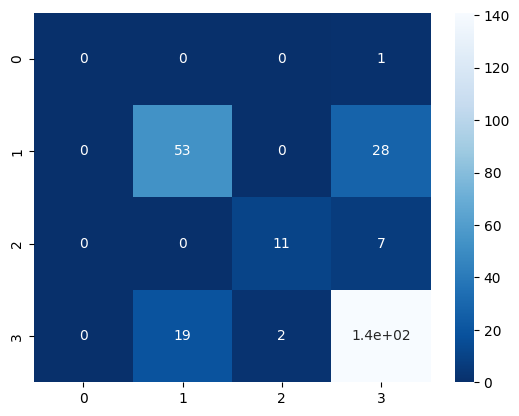

In [32]:
CM = confusion_matrix(y_test, y_preds)
# ConfusionMatrixDisplay(CM, display_labels=le.classes_).plot()
sn.heatmap(CM, annot=True, cmap="Blues_r")


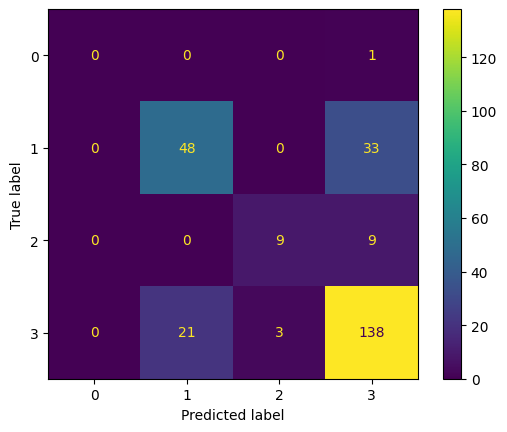

In [13]:
# importing the required libraries for logistic regression
from sklearn.linear_model import LogisticRegression

np.random.seed(42)
#njobs was set to -1 for high computational power and max_iter was increased as I was having some warning.. 
LR = LogisticRegression(solver = "newton-cg", multi_class = "multinomial", max_iter= 500, n_jobs = -1) 

LR.fit(X_train, y_train)

y_preds = LR.predict(X_test)

#Confusion Matrix for Logistic Regression
CM = confusion_matrix(y_test, y_preds)
ConfusionMatrixDisplay(CM).plot();

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_preds), precision_score(y_test, y_preds, average=None), recall_score(y_test, y_preds, average=None), f1_score(y_test, y_preds, average=None)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.7442748091603053,
 array([0.        , 0.69565217, 0.75      , 0.76243094]),
 array([0.        , 0.59259259, 0.5       , 0.85185185]),
 array([0.        , 0.64      , 0.6       , 0.80466472]))

In [15]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
np.random.seed(42)
## fit the data to calculate mean and variance of training data
SS.fit(X_train)

## standardize the training set
X_train_SS = SS.fit_transform(X_train)

## standardize the test set using the mean of train set.
X_test_SS =SS.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)
KNN = KNeighborsClassifier()

KNN.fit(X_train_SS, y_train)

y_preds = KNN.predict(X_test_SS)

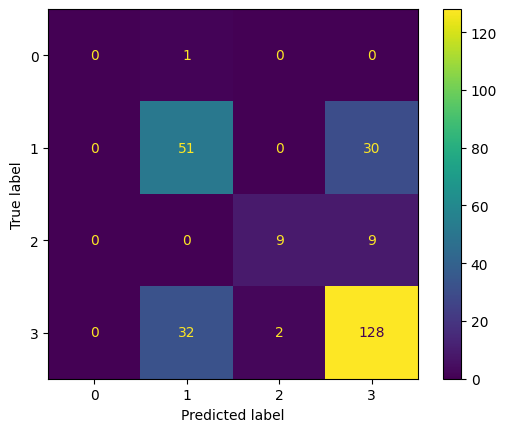

In [17]:
CM = confusion_matrix(y_test, y_preds)
ConfusionMatrixDisplay(CM).plot();

In [18]:
accuracy_score(y_test, y_preds), precision_score(y_test, y_preds, average=None), recall_score(y_test, y_preds, average=None), f1_score(y_test, y_preds, average=None)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.7175572519083969,
 array([0.        , 0.60714286, 0.81818182, 0.76646707]),
 array([0.        , 0.62962963, 0.5       , 0.79012346]),
 array([0.        , 0.61818182, 0.62068966, 0.7781155 ]))

In [19]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

KNN.fit(X_train, y_train)

y_preds = KNN.predict(X_test)

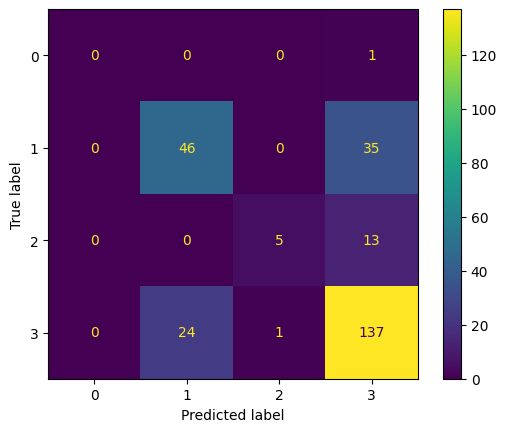

In [20]:
CM = confusion_matrix(y_test, y_preds)
ConfusionMatrixDisplay(CM).plot();

In [21]:
accuracy_score(y_test, y_preds), precision_score(y_test, y_preds, average=None), recall_score(y_test, y_preds, average=None), f1_score(y_test, y_preds, average=None)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.7175572519083969,
 array([0.        , 0.65714286, 0.83333333, 0.73655914]),
 array([0.        , 0.56790123, 0.27777778, 0.84567901]),
 array([0.        , 0.60927152, 0.41666667, 0.78735632]))